<a href="https://colab.research.google.com/github/Iliasecc/Tdlog_Projet/blob/main/Tdlog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#tdlog

In [ ]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression


from sklearn import metrics
from statsmodels.tools.eval_measures import mse, rmse

sns.set_theme(style="whitegrid")

DataSet

Employee ID: The unique ID allocated for each employee (example: fffe390032003000)

Date of Joining: The date-time when the employee has joined the organization (example: 2008-12-30)

Gender: The gender of the employee (Male/Female)

Company Type: The type of company where the employee is working (Service/Product)

WFH Setup Available: Is the work from home facility available for the employee (Yes/No)

Designation: The designation of the employee of work in the organization.
In the range of [0.0, 5.0] bigger is higher designation.

Resource Allocation: The amount of resource allocated to the employee to work, ie. number of working hours.
In the range of [1.0, 10.0] (higher means more resource)

Mental Fatigue Score: The level of fatigue mentally the employee is facing.
In the range of [0.0, 10.0] where 0.0 means no fatigue and 10.0 means completely fatigue.

Burn Rate: The value we need to predict for each employee telling the rate of Bur out while working.
In the range of [0.0, 1.0] where the higher the value is more is the burn out.

In [ ]:
burnout_train = pd.read_csv('/content/train.csv')
burnout_train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [ ]:
# Afficher le nombre de lignes et de colonnes
print(f"Nombre de lignes : {burnout_train.shape[0]}")
print(f"Nombre de colonnes : {burnout_train.shape[1]}")


Nombre de lignes : 22750
Nombre de colonnes : 9


Traitement des données

In [ ]:
burnout_train.isna().sum()

,0
Employee ID,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,1381
Mental Fatigue Score,2117
Burn Rate,1124


In [ ]:
# Drop NA values
burnout_train = burnout_train.dropna()
burnout_train.isna().sum()

,0
Employee ID,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,0
Mental Fatigue Score,0
Burn Rate,0


In [ ]:
burnout_train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
5,fffe3300350037003500,2008-11-26,Male,Product,Yes,2.0,4.0,3.6,0.29


In [ ]:
burnout_train.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,18590.000000,18590.000000,18590.000000,18590.000000
mean,2.179398,4.486552,5.732173,0.452444
std,1.133148,2.044848,1.920547,0.197848
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.320000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [ ]:
burnout_train_2 = burnout_train.copy()

In [ ]:
burnout_train_2.nunique()

,0
Employee ID,18590
Date of Joining,366
Gender,2
Company Type,2
WFH Setup Available,2
Designation,6
Resource Allocation,10
Mental Fatigue Score,101
Burn Rate,101


Visualisation

In [ ]:
burnout_train_2['Gender']              = burnout_train_2['Gender'].map({'Female': 1, 'Male': 0})
burnout_train_2['Company Type']        = burnout_train_2['Company Type'].map({'Service': 1, 'Product': 0})
burnout_train_2['WFH Setup Available'] = burnout_train_2['WFH Setup Available'].map({'Yes': 1, 'No': 0})

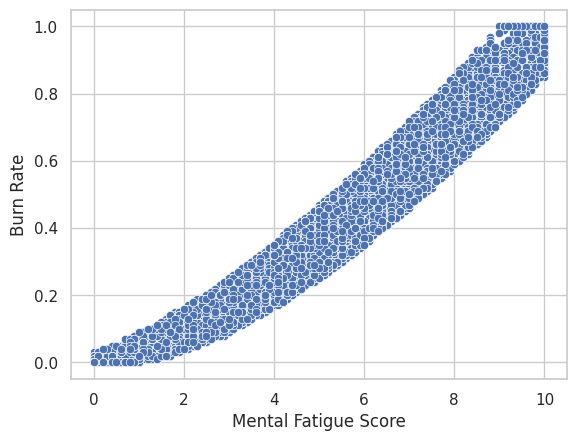

In [ ]:
sns.scatterplot(data=burnout_train_2, x='Mental Fatigue Score', y='Burn Rate');

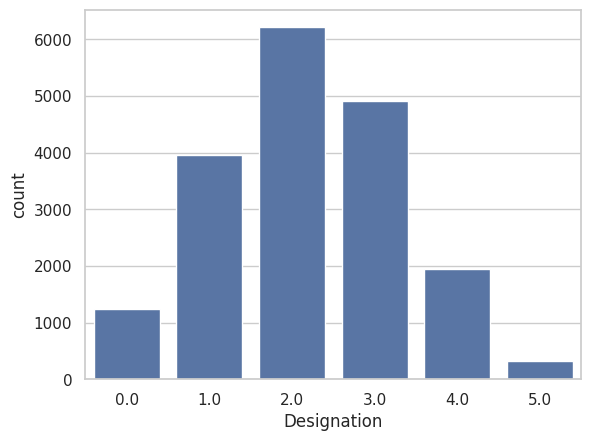

In [ ]:
sns.countplot(data=burnout_train, x='Designation');

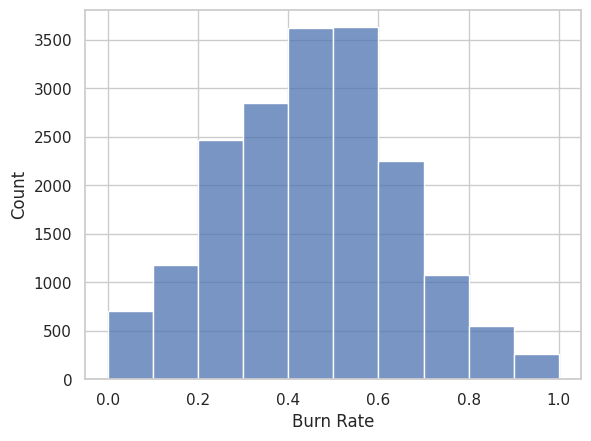

In [ ]:
sns.histplot(data=burnout_train, x='Burn Rate', bins=10);

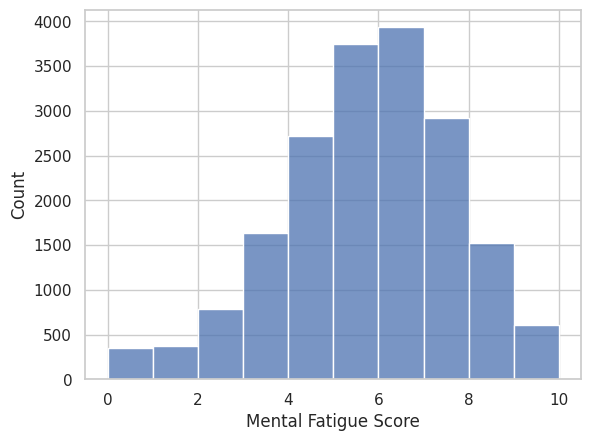

In [ ]:
sns.histplot(data=burnout_train, x='Mental Fatigue Score', bins=10);

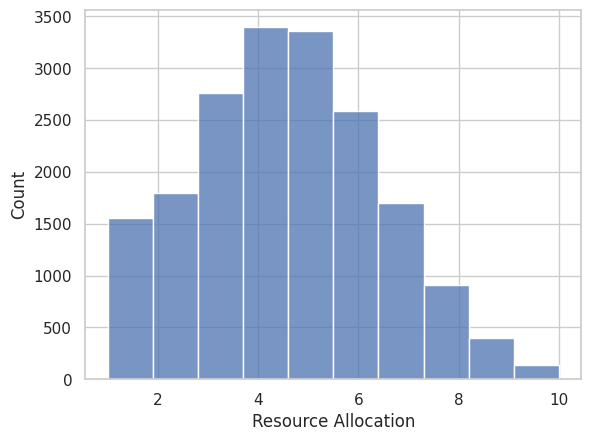

In [ ]:
sns.histplot(data=burnout_train, x='Resource Allocation', bins=10);

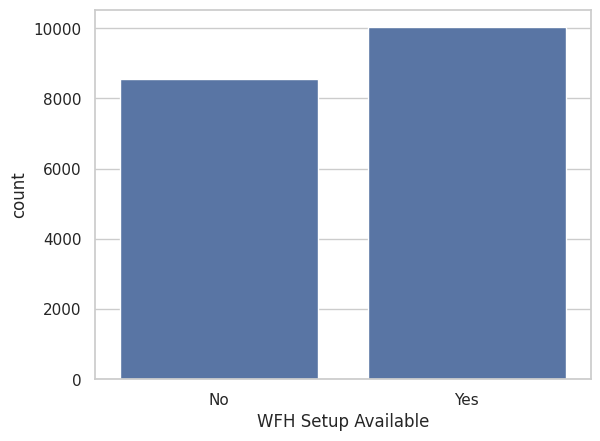

In [ ]:
sns.countplot(data=burnout_train, x='WFH Setup Available');

Employee ID              object
Date of Joining          object
Gender                    int64
Company Type              int64
WFH Setup Available       int64
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object


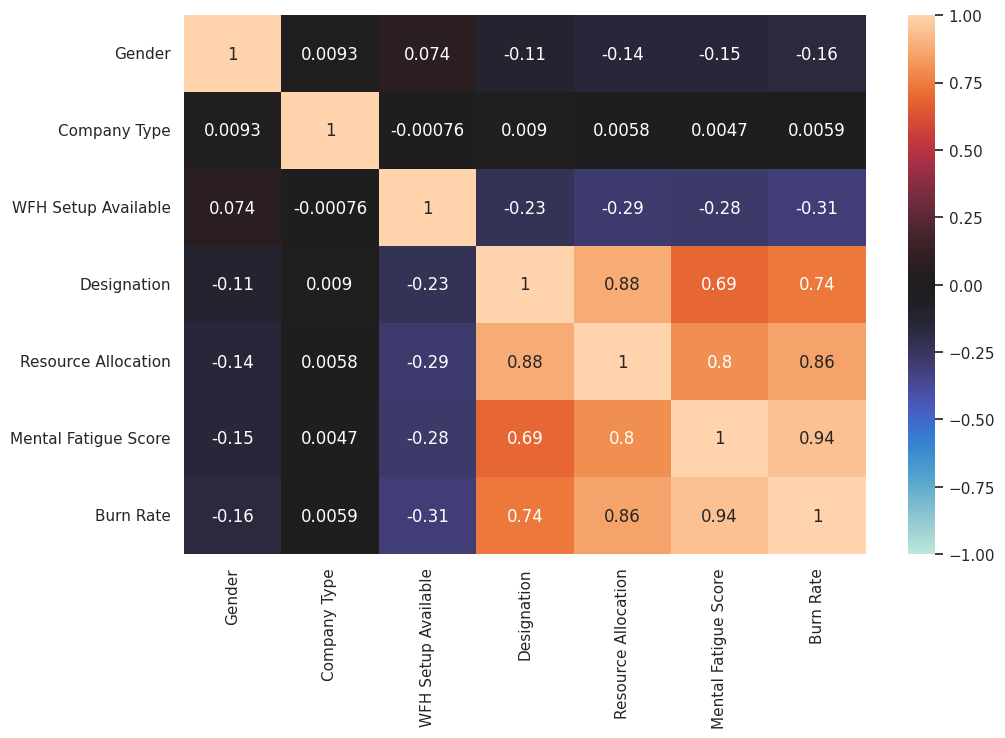

In [ ]:
# Vérifier les types de données
print(burnout_train_2.dtypes)

# Sélectionner seulement les colonnes numériques
burnout_train_numeric = burnout_train_2.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation et afficher le heatmap
plt.figure(figsize=(11,7))
corr = burnout_train_numeric.corr()
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True);


**Insights**

Il est notable que les variables **Designation** (niveau de séniorité), **Resource Allocation** (heures par jour) et **Mental Fatigue Score** (évaluation fournie par l'employé) influencent directement le taux de burnout, étant directement proportionnelles ou présentant une corrélation fortement positive.

Une hypothèse est que plus la séniorité est élevée, plus le risque de burnout est important. On peut observer que cette variable est directement liée au niveau de fatigue mentale déclaré par les employés, ainsi qu'aux heures allouées.

Une autre hypothèse qui peut être avancée est que de nombreuses heures par jour sont directement liées au burnout. De plus, la quantité d'heures est également directement liée à la note de fatigue mentale fournie par les employés.

Il est également important de souligner la variable **WFH Setup Available** (disponibilité du télétravail), où l'on peut observer une corrélation inverse (ou négative). Les employés ayant accès au télétravail (valeur de **WFH Setup Available** égale à 1) tendent à avoir un taux de burnout plus faible, tandis que ceux qui n'en bénéficient pas (valeur égale à 0) ont tendance à avoir un taux de burnout plus élevé.

On peut également observer que les employés disposant du télétravail (**WFH Setup Available** égal à 1) présentent une fatigue mentale moindre, tandis que ceux qui n'en bénéficient pas ont une fatigue mentale plus élevée.

Enfin, il n'y a pas de corrélation directe entre le type d'entreprise et le burnout, ce qui laisse penser que cela n'est pas influencé par le type de société.

Pre-entrainement


In [ ]:

drop_list = ['Employee ID', 'Date of Joining', 'Company Type']

burnout_train_3 = burnout_train_2.drop(drop_list, axis=1)

burnout_train_3 = pd.get_dummies(burnout_train_3, columns = [
    'Gender', 'WFH Setup Available'
])

In [ ]:
burnout_train_3.head()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Gender_0,Gender_1,WFH Setup Available_0,WFH Setup Available_1
0,2.0,3.0,3.8,0.16,False,True,True,False
1,1.0,2.0,5.0,0.36,True,False,False,True
3,1.0,1.0,2.6,0.20,True,False,False,True
4,3.0,7.0,6.9,0.52,False,True,True,False
5,2.0,4.0,3.6,0.29,True,False,False,True


In [ ]:
X = np.array(burnout_train_3.drop('Burn Rate', axis=1))
y = np.array(burnout_train_3['Burn Rate'])

In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,  y,test_size=0.2,shuffle=True,stratify=y,random_state=42)

In [ ]:
print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)

Train shape: (14872, 7)
Test shape: (3718, 7)


Entrainement

In [ ]:
model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print('MAE:', np.round(metrics.mean_absolute_error(y_test, y_pred),4))
print('MSE:', np.round(metrics.mean_squared_error(y_test, y_pred), 4) )
print('R2:', np.round(metrics.r2_score(y_test, y_pred), 4) )
print('RMSE:', np.round(rmse(y_test, y_pred), 4) )

MAE: 0.0457
MSE: 0.0031
R2: 0.9204
RMSE: 0.0558


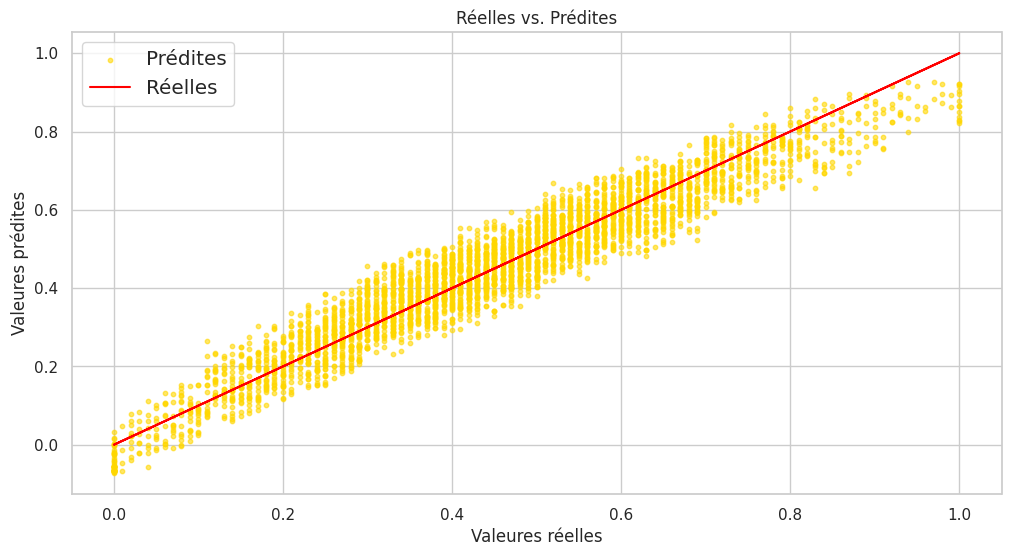

In [ ]:
def plot_regression_comparison(y_true, y_pred, title="Réelles vs. Prédites",
                               xlabel="Valeures réelles", ylabel="Valeures prédites",
                               figsize=(12, 6), scatter_color="#FFD700", scatter_alpha=0.6,
                               scatter_size=10, reference_line_color="red", reference_label="Réelles"):
    plt.figure(figsize=figsize)
    plt.scatter(y_true, y_pred, color=scatter_color, alpha=scatter_alpha, s=scatter_size, label="Prédites")
    plt.plot(y_true, y_true, reference_line_color, label=reference_label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(fontsize="large", loc="best")
    plt.show()
plot_regression_comparison(y_test, y_pred)

NEW UTILISATEUR

In [ ]:
import numpy as np
import pandas as pd



# Fonction pour prédire le Burn Rate d'un nouvel utilisateur
def predict_burn_rate(designation, resource_allocation, mental_fatigue_score, gender, wfh_setup):
    # Créer une liste des nouvelles données
    new_data = [[designation, resource_allocation, mental_fatigue_score,
                 1 if gender == 'Female' else 0,  # Gender_1
                 1 if gender == 'Male' else 0,  # Gender_0
                 1 if wfh_setup == 'Yes' else 0,  # WFH Setup Available_1
                 1 if wfh_setup == 'No' else 0]]  # WFH Setup Available_0

    # Convertir en array et standardiser
    new_data = np.array(new_data)
    new_data_scaled = scaler.transform(new_data)

    # Prédiction du Burn Rate
    burn_rate_prediction = model.predict(new_data_scaled)

    return burn_rate_prediction[0]

# Exemple d'utilisation de la fonction avec un nouvel utilisateur
designation = 2.0
resource_allocation = 4.0
mental_fatigue_score = 3.6
gender = 'Female'  # Valeur à entrer : 'Male' ou 'Female'
wfh_setup = 'Yes'  # Valeur à entrer : 'Yes' ou 'No'

burn_rate = predict_burn_rate(designation, resource_allocation, mental_fatigue_score, gender, wfh_setup)
print(f"Burn Rate prédit pour cette personne : {burn_rate}")


Burn Rate prédit pour cette personne : 0.2896853632347948


In [ ]:
import pickle
import numpy as np
import pandas as pd

# Charger le modèle depuis le fichier importé
with open("model.pkl", "rb") as file:
    model = pickle.load(file)

# Si un scaler est nécessaire et stocké séparément
# Assurez-vous d'importer également `scaler.pkl`
try:
    with open("scaler.pkl", "rb") as file:
        scaler = pickle.load(file)
except FileNotFoundError:
    print("Scaler non trouvé. Assurez-vous d'avoir le fichier 'scaler.pkl'.")


Scaler non trouvé. Assurez-vous d'avoir le fichier 'scaler.pkl'.


In [ ]:
# Fonction pour prédire le Burn Rate d'un nouvel utilisateur
def predict_burn_rate(designation, resource_allocation, mental_fatigue_score, gender, wfh_setup):
    # Créer une liste des nouvelles données
    new_data = [[designation, resource_allocation, mental_fatigue_score,
                 1 if gender == 'Female' else 0,  # Gender_1
                 1 if gender == 'Male' else 0,    # Gender_0
                 1 if wfh_setup == 'Yes' else 0,  # WFH Setup Available_1
                 1 if wfh_setup == 'No' else 0]]  # WFH Setup Available_0

    # Convertir en array et standardiser
    new_data = np.array(new_data)
    new_data_scaled = scaler.transform(new_data)  # Vérifiez que `scaler` est chargé

    # Prédiction du Burn Rate
    burn_rate_prediction = model.predict(new_data_scaled)

    return burn_rate_prediction[0]

# Exemple d'utilisation de la fonction
designation = 2.0
resource_allocation = 4.0
mental_fatigue_score = 3.6
gender = 'Female'  # Valeur à entrer : 'Male' ou 'Female'
wfh_setup = 'Yes'  # Valeur à entrer : 'Yes' ou 'No'

burn_rate = predict_burn_rate(designation, resource_allocation, mental_fatigue_score, gender, wfh_setup)
print(f"Burn Rate prédit pour cette personne : {burn_rate}")


Burn Rate prédit pour cette personne : 0.2896853632347948


In [ ]:
import pickle

# Exemple : Sauvegarder le modèle dans un fichier model.pkl
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
from google.colab import files

# Télécharger le fichier model.pkl
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle

# Sauvegarder le modèle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
import pickle

# Charger le fichier modèle
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

# Vérification
print(model)


LinearRegression()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Charger vos données (assurez-vous que 'burnout_train_3' est déjà chargé dans votre environnement)
# Exemple de création de DataFrame :
# burnout_train_3 = pd.read_csv("burnout_data.csv")

X = np.array(burnout_train_3.drop('Burn Rate', axis=1))
y = np.array(burnout_train_3['Burn Rate'])

# Normalisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Séparation en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)

# Entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions et évaluation
y_pred = model.predict(X_test)

print('MAE:', np.round(metrics.mean_absolute_error(y_test, y_pred), 4))
print('MSE:', np.round(metrics.mean_squared_error(y_test, y_pred), 4))
print('R2:', np.round(metrics.r2_score(y_test, y_pred), 4))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 4))

# Sauvegarder le modèle et le scaler pour une utilisation ultérieure
import pickle
with open('model1.pkl', 'wb') as file:
    pickle.dump(model, file)
with open('scaler1.pkl', 'wb') as file:
    pickle.dump(scaler, file)


Train shape: (14872, 7)
Test shape: (3718, 7)
MAE: 0.0457
MSE: 0.0031
R2: 0.9204
RMSE: 0.0558


In [ ]:
import pickle
import numpy as np
import pandas as pd

# Charger le modèle depuis le fichier importé
with open("model1.pkl", "rb") as file:
    model = pickle.load(file)

# Si un scaler est nécessaire et stocké séparément
# Assurez-vous d'importer également `scaler.pkl`
try:
    with open("scaler1.pkl", "rb") as file:
        scaler = pickle.load(file)
except FileNotFoundError:
    print("Scaler non trouvé. Assurez-vous d'avoir le fichier 'scaler.pkl'.")


In [ ]:
import os

# Vérifier si les fichiers existent
model_path = "/content/model1.pkl"
scaler_path = "/content/scaler1.pkl"

if os.path.exists(model_path):
    print(f"Le modèle est trouvé à : {model_path}")
else:
    print("Modèle non trouvé. Vérifiez le chemin du fichier.")

if os.path.exists(scaler_path):
    print(f"Le scaler est trouvé à : {scaler_path}")
else:
    print("Scaler non trouvé. Vérifiez le chemin du fichier.")


Le modèle est trouvé à : /content/model1.pkl
Le scaler est trouvé à : /content/scaler1.pkl


In [ ]:
import pickle
import numpy as np

# Charger le modèle et le scaler depuis les fichiers importés
model_path = "/content/model1.pkl"
scaler_path = "/content/scaler1.pkl"

try:
    with open(model_path, "rb") as file:
        model = pickle.load(file)
    print("Modèle chargé avec succès.")
except FileNotFoundError:
    print(f"Le modèle n'a pas été trouvé à l'emplacement {model_path}")

try:
    with open(scaler_path, "rb") as file:
        scaler = pickle.load(file)
    print("Scaler chargé avec succès.")
except FileNotFoundError:
    print(f"Le scaler n'a pas été trouvé à l'emplacement {scaler_path}")

# Fonction pour prédire le Burn Rate d'un nouvel utilisateur
def predict_burn_rate(designation, resource_allocation, mental_fatigue_score, gender, wfh_setup):
    # Créer une liste des nouvelles données
    new_data = [[designation, resource_allocation, mental_fatigue_score,
                 1 if gender == 'Female' else 0,  # Gender_1
                 1 if gender == 'Male' else 0,    # Gender_0
                 1 if wfh_setup == 'Yes' else 0,  # WFH Setup Available_1
                 1 if wfh_setup == 'No' else 0]]  # WFH Setup Available_0

    # Convertir en array
    new_data = np.array(new_data)

    # Vérifiez si le scaler a bien été chargé
    if 'scaler' in globals():
        new_data_scaled = scaler.transform(new_data)  # Appliquer la transformation avec le scaler
    else:
        raise ValueError("Scaler non disponible. Assurez-vous d'avoir chargé le scaler correctement.")

    # Prédiction du Burn Rate
    burn_rate_prediction = model.predict(new_data_scaled)

    return burn_rate_prediction[0]

# Exemple d'utilisation de la fonction
designation = 2.0
resource_allocation = 4.0
mental_fatigue_score = 3.6
gender = 'Female'  # Valeur à entrer : 'Male' ou 'Female'
wfh_setup = 'Yes'  # Valeur à entrer : 'Yes' ou 'No'

try:
    burn_rate = predict_burn_rate(designation, resource_allocation, mental_fatigue_score, gender, wfh_setup)
    print(f"Burn Rate prédit pour cette personne : {burn_rate}")
except ValueError as e:
    print(f"Erreur : {e}")


Modèle chargé avec succès.
Scaler chargé avec succès.
Burn Rate prédit pour cette personne : 0.2896853632347948
